In [1]:
#This program uses an artificialrecurrent neural network called Long Short Term Memory (LSTM)
#To predict the closing stock price of a corporation (Boeing Inc.) using the past 60 days stock prices

In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=307ad723db877690af9a14da163caeb0a41a2cc14ac532a2bc2f8d22d6cb10bd
  Stored in directory: c:\users\josh\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=ee8f8d885512828280541381e101517cfddf783d2abcc8aaa1129fd0c923a168
  Stored in directory: c:\users\josh\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
#pip install datareader, keras and tensorflow then...
#Import the libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
#get the stock quote
df = web.DataReader('BA', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,75.000000,74.120003,74.699997,74.220001,6859300.0,60.731094
2012-01-04,74.599998,73.589996,74.099998,74.330002,4923000.0,60.821095
2012-01-05,73.900002,72.739998,73.769997,73.529999,6797900.0,60.166485
2012-01-06,74.269997,72.949997,73.730003,73.980003,4779800.0,60.534698
2012-01-09,74.870003,74.180000,74.809998,74.529999,4469600.0,60.984760
...,...,...,...,...,...,...
2019-12-11,350.029999,338.500000,342.100006,350.000000,7369100.0,347.929932
2019-12-12,351.070007,341.000000,348.250000,346.290009,5970000.0,344.241882
2019-12-13,349.309998,341.100006,346.299988,341.670013,4526300.0,339.649200


In [10]:
#Get the number of rows and columns in the data set
df.shape  #our data has 2003 rows and 6 columns (as we can see above)

(2003, 6)

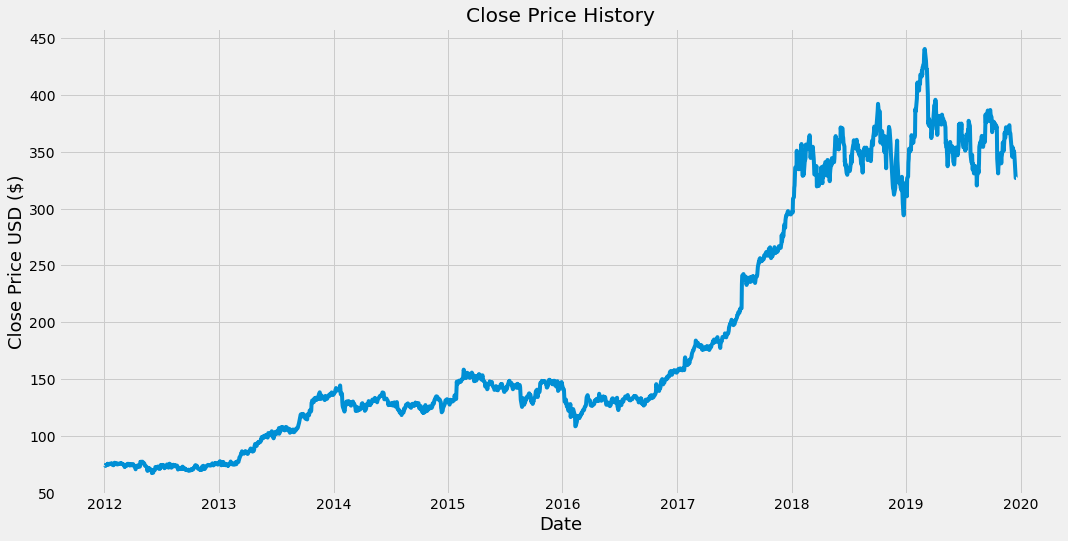

In [11]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [13]:
#Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the LSTM model on. Train it on 80% of the data that we have
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1603

In [15]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1)) #0 to 1 inclusive
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0186941 ],
       [0.01898871],
       [0.01684611],
       ...,
       [0.73498853],
       [0.69569876],
       [0.69569876]])

In [21]:
#Create the training data set
#Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.0186941 , 0.01898871, 0.01684611, 0.01805133, 0.01952435,
       0.02078312, 0.02008678, 0.02214903, 0.01971182, 0.02142589,
       0.02094381, 0.02228293, 0.0221758 , 0.02214903, 0.02174729,
       0.02297928, 0.02161337, 0.01957792, 0.01853341, 0.01858697,
       0.02177408, 0.02137234, 0.02437195, 0.02201511, 0.02131876,
       0.02201511, 0.02319354, 0.0206492 , 0.02038138, 0.02228293,
       0.02134555, 0.02150624, 0.0217205 , 0.02271146, 0.02362205,
       0.02305962, 0.02362205, 0.02134555, 0.02121165, 0.0206492 ,
       0.02099739, 0.0205153 , 0.01845305, 0.01424822, 0.01681932,
       0.01856018, 0.01620334, 0.01703359, 0.01893513, 0.02139913,
       0.02193476, 0.02131876, 0.02185442, 0.02115807, 0.02080991,
       0.01789062, 0.01802454, 0.02126521, 0.02027425, 0.01898871])]
[0.018319149439177812]

[array([0.0186941 , 0.01898871, 0.01684611, 0.01805133, 0.01952435,
       0.02078312, 0.02008678, 0.02214903, 0.01971182, 0.02142589,
       0.02094381, 0.02228293, 0.0

In [20]:
#The top many rows are the x_train data set - the past 60 values
# Only this row is the x_train data set - the 61st value

In [22]:
#Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
#Reshape the data b/c a LSTM network expects it to be 3 dimensional
x_train.shape #shows us that it's currently only 2D, 1543 rows and 60 columns
#reshape it to 3D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1) ) #the 1 is the closing price
x_train.shape  #shows us that now it's 3 dimensional

(1543, 60, 1)

In [29]:
#Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1))) #50 neurons,
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') #the loss function measures how well the model did on training 

In [32]:
#Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 26s 15ms/step - loss: 0.0017


In [34]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [35]:
#Convert the data to a numpy array

x_test = np.array(x_test)


In [39]:
#Reshape the data
x_test = np.reshape(x_test,( x_test.shape[0], x_test.shape[1],1))

In [40]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [43]:
#Get the root mean squared error (RMSE) - How accurate the model predicts the response

rmse = np.sqrt( np.mean (predictions - y_test ) **2 )
rmse   #a value of 0 would mean that our forcast was exact

8.882731170654298

<ipython-input-45-c880ed03b4aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

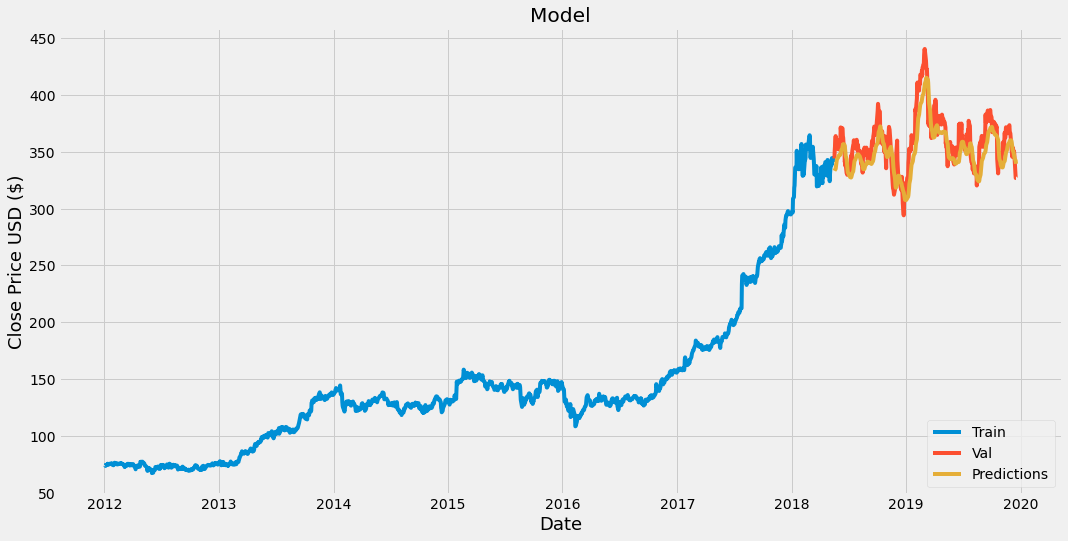

In [45]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show


In [46]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,344.140015,333.378601
2018-05-18,351.230011,333.948639
2018-05-21,363.920013,335.066467
2018-05-22,355.019989,337.408600
2018-05-23,359.209991,339.447479
...,...,...
2019-12-11,350.000000,346.435059
2019-12-12,346.290009,345.139801
2019-12-13,341.670013,343.835999


In [51]:
#Get the quote

BA_quote = web.DataReader('BA', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new df
new_df = BA_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the df to an array

last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a np array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,( X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

#This is what the model believes the price will be on Dec 18th 2019

[[336.3716]]


In [52]:
#Get the quote

BA_quote2 = web.DataReader('BA', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(BA_quote2['Close'])

Date
2019-12-18    330.679993
Name: Close, dtype: float64
